In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Computer\AppData\Local\Temp\ipykernel_6020\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


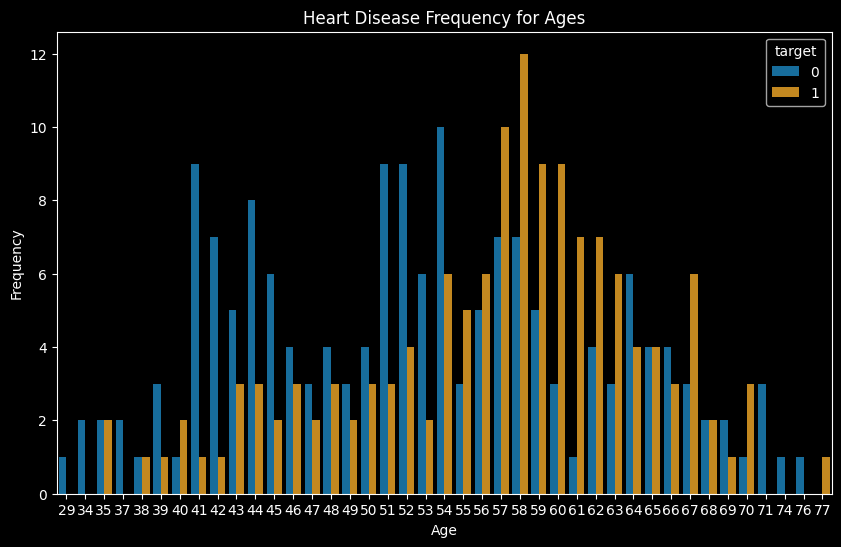

In [11]:
df = pd.read_csv("cleveland.csv", header=None)
df.columns = ["age", "sex", "cp", "trestbps", "chol", 
              "fbs", "restecg", "thalach", "exang", 
              "oldpeak", "slope", "ca", "thal", "target"]

# 0: no disease, 1: disease
df["target"] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1}) 
df["thal"] = df.thal.fillna(df.thal.mean()) # fill missing values with the mean
df["ca"] = df.ca.fillna(df.ca.mean()) # fill missing values

# distribution of target vs age but not all ages are shown
plt.figure(figsize=(10, 6))
sns.countplot(x="age", hue="target", data=df, palette="colorblind")
plt.title("Heart Disease Frequency for Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

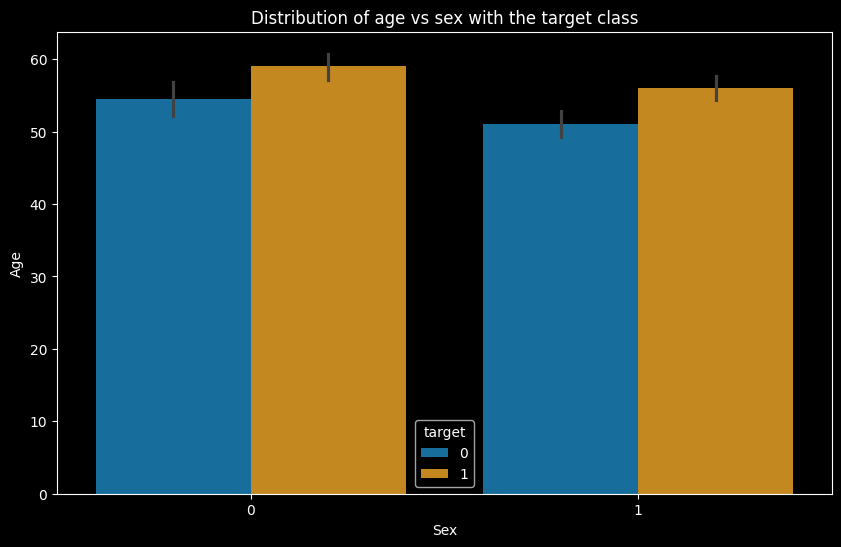

In [12]:
# barplot of age vs sex with hue = target 
plt.figure(figsize=(10, 6))
sns.barplot(x="sex", y="age", hue="target", data=df, palette="colorblind")
plt.title("Distribution of age vs sex with the target class")
plt.xlabel("Sex")
plt.ylabel("Age")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split


X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


knn_model = KNeighborsClassifier(
    n_neighbors=5, 
    weights="uniform", 
    algorithm="auto", 
    leaf_size=30, 
    p=2,
    metric="minkowski",
)
knn_model.fit(X_train, y_train)

y_pred_train = knn_model.predict(X_train)
y_pred_test = knn_model.predict(X_test)

print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, y_pred_test))

Train Accuracy:  0.756198347107438
Test Accuracy:  0.6885245901639344


In [16]:
from sklearn.svm import SVC


svm_model = SVC(
    C=1.0,
    kernel="rbf", 
    gamma="scale",
    random_state=42
)
svm_model.fit(X_train, y_train)

y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, y_pred_test))

Train Accuracy:  0.6611570247933884
Test Accuracy:  0.6721311475409836


In [17]:
from sklearn.naive_bayes import GaussianNB


nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred_train = nb_model.predict(X_train)
y_pred_test = nb_model.predict(X_test)

print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))   
print("Test Accuracy: ", accuracy_score(y_test, y_pred_test))

Train Accuracy:  0.8471074380165289
Test Accuracy:  0.8360655737704918


In [18]:
from sklearn.tree import DecisionTreeClassifier


dt_model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=10,
    min_samples_split=2,
    random_state=42,
    ccp_alpha=0.0
)
dt_model.fit(X_train, y_train)

y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, y_pred_test))

Train Accuracy:  1.0
Test Accuracy:  0.7540983606557377


In [22]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(
    criterion="gini",
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    n_estimators=10,
    random_state=42,
)
rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, y_pred_test))

Train Accuracy:  0.9834710743801653
Test Accuracy:  0.8032786885245902


In [23]:
from sklearn.ensemble import AdaBoostClassifier


ada_model = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
ada_model.fit(X_train, y_train)

y_pred_train = ada_model.predict(X_train)
y_pred_test = ada_model.predict(X_test)

print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, y_pred_test))

Train Accuracy:  0.9132231404958677
Test Accuracy:  0.8360655737704918


c:\Users\Computer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [24]:
from sklearn.ensemble import GradientBoostingClassifier


gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    subsample=1.0,
    min_samples_split=2,
    max_depth=3,
    random_state=42
)
gb_model.fit(X_train, y_train)

y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)

print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, y_pred_test))

Train Accuracy:  0.9958677685950413
Test Accuracy:  0.8524590163934426


In [33]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    objective="binary:logistic",
    random_state=42
)
xgb_model.fit(X_train, y_train)

y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, y_pred_test))

Train Accuracy:  1.0
Test Accuracy:  0.8688524590163934


In [34]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression


dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()
xgb_model = xgb.XGBClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
svm_model = SVC(random_state=42)
ada_model = AdaBoostClassifier(random_state=42)

estimators = [
    ("dt", dt_model),
    ("rf", rf_model),
    ("knn", knn_model),
    ("xgb", xgb_model),
    ("gb", gb_model),
    ("svm", svm_model),
    ("ada", ada_model),
]

# train the stacking model using heterogeneous approach
stack_model = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression(),
)
stack_model.fit(X_train, y_train)

y_pred_train = stack_model.predict(X_train)
y_pred_test = stack_model.predict(X_test)

print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, y_pred_test))

c:\Users\Computer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Computer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Computer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Computer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the 

Train Accuracy:  1.0
Test Accuracy:  0.8852459016393442


c:\Users\Computer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
